<a href="https://colab.research.google.com/github/RafaelRamos19/Clustering/blob/main/Clustering%2C_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'
df = pd.read_csv(uri)
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 200 kB 62.5 MB/s 
     |████████████████████████████████| 2.3 MB 49.3 MB/s 
     |████████████████████████████████| 51 kB 675 kB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 54.9 MB/s 
     |████████████████████████████████| 5.8 MB 47.6 MB/s 
     |████████████████████████████████| 251 kB 71.8 MB/s 
     |████████████████████████████████| 3.1 MB 36.8 MB/s 
     |████████████████████████████████| 100 kB 10.8 MB/s 
     |████████████████████████████████| 90 kB 10.5 MB/s 
     |████████████████████████████████| 121 kB 71.4 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 127 kB 59.5 MB/s 
  Created wheel for biokit: filename=biok

In [ ]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


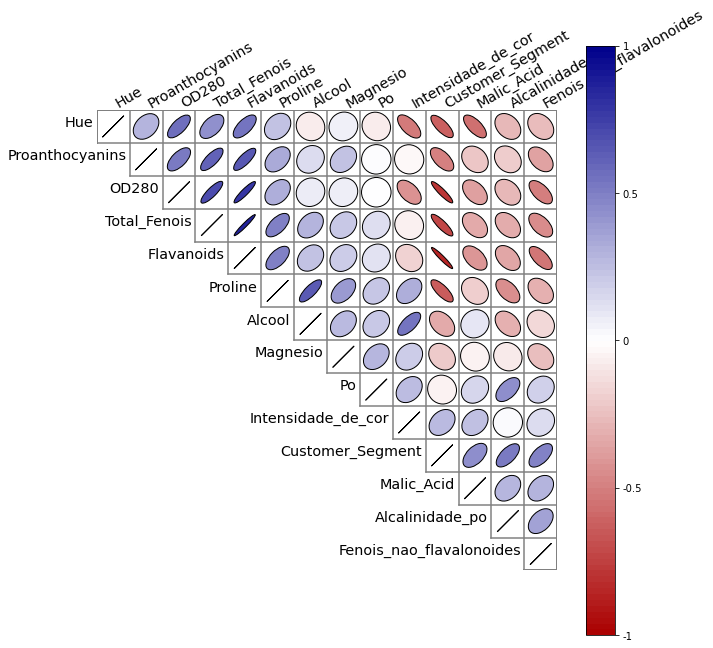

In [ ]:
corr_graph = corrplot.Corrplot(df.corr())
corr_graph.plot(upper ='ellipse', fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(20,20)
fig.show()

Em azul temos aqueles que possuem correlação positiva e em vermelho correlação negativa
Quanto mais próximo de uma linha reta, maior é a correlação entre as variáveis

Como foi visto no describe existem variáveis que variam de forma diferente, isso é um problema para algoritmos de machine Learn, por isso eles devem ser colocados na mesma escala pelo processo de normalização

In [ ]:
atributos = df.columns
atributos

Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_Fenois', 'Flavanoids', 'Fenois_nao_flavalonoides',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
for atributo in atributos:
    df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo])-min(df[atributo]))

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Normalização por sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)


In [ ]:
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#df = min_max_scaler.inverse_transform(df) função que faz o data frame ter os valores que possuia antes (desnormaliza)

# Introdução K-means

In [ ]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters = 4)
agrupador.fit(df)


KMeans(n_clusters=4)

In [ ]:
labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], y = df['Alcool'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'],
                         y = df['Alcool'], mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = labels))

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y = df['Alcool'], z = df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
2,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333


In [ ]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y = centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))
fig.show()

#Usando DBScan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [ ]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

In [ ]:
agrupador = DBSCAN(eps = 0.10, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

# Coeficiente de Silhueta

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'], 
                           y = df['Alcool'], 
                           z = df['Proline'], 
                           mode = 'markers', 
                           marker = dict(color = labels.astype(float)), 
                           text = labels))
fig.show()